# Previous Lesson Overview - Day 9

In the previous lesson you learned how to: 

1. Modify dataframe
2. Modify values
3. Clean data and make a function to import data
4. Merge, concat, append
5. Automation 

# Day 10: Pandas_Math
In this lesson we will learn simple math/stats and we will start analyzing data.

# Goals:

Students will be able to :

1. Introduction to math and stats with dataframes
2. Introduction to groupby and pivot tables

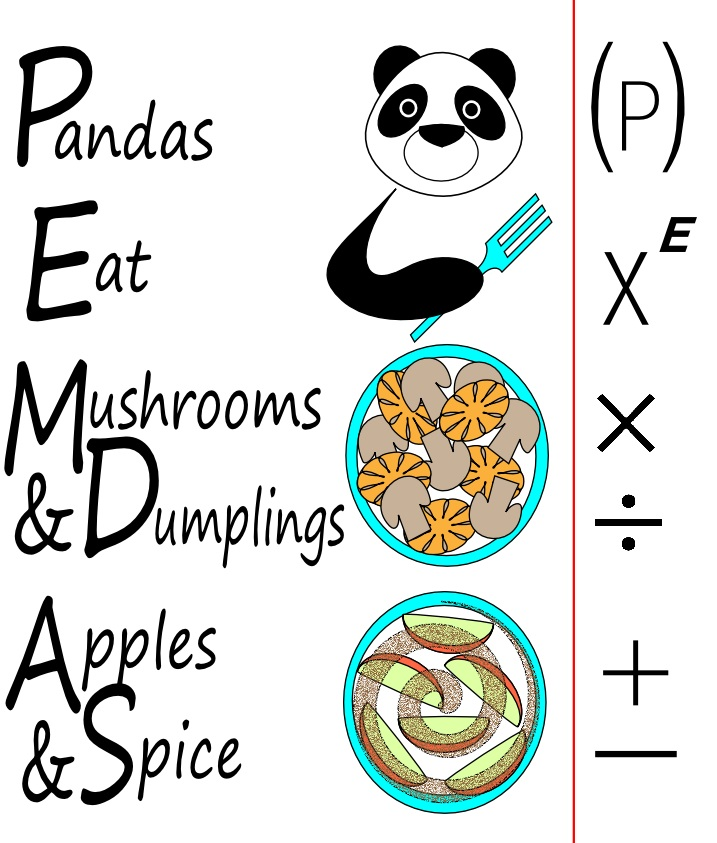

# System version when preparing this notebook
- python 3.8.11
- padas 1.1.3
- numpy 1.20.3

This lesson was prepared by Maria D Hernandez Limon for NRT Environment Science Bootcamps 2021. 

# Set-Up working Space

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#this library helps process dates in timseries data
import datetime

In [ ]:
#sanity check my versions
print (pd.__version__)

In [ ]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'

# Note for Day 8
If you need to combine multiple tables look into GLOB:

https://docs.python.org/3/library/glob.html

https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/

I'll show an example of how to use glob in the map lessson.

# 14. Basic stats with a dataframe

Remeber the math you learned with numpy, well you can do all of that with entire dataframes or specific columns(since columns are series).

If you want to do full on calculations with tables then use numpy. Pandas is best suited for analyzing dataframes with some categorical column. You can create functions to analyze your df and there are some cool tricks that I will mention below but again if you want to do mathematical analyses on your tables then numpy is your go to.

In [ ]:
pokemon=pd.read_csv(datadirectory+'Pokemon.csv', usecols=['Number','Name','HP','Attack','Defense','Type 1'])
pokemon.head()

In [ ]:
pokemon.info()

## 14.1 Summary stats on the whole df

In [ ]:
pokemon.describe()

In [ ]:
pokemon.describe([.15,.3,.9])

In [ ]:
pokemon.mean()

In [ ]:
np.mean(pokemon)

In [ ]:
pokemon.std()

In [ ]:
np.std(pokemon)

### corr 
Fast table with correlations for all the numeric vals in your table
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [ ]:
pokemon.corr()

## 14.2 math with whole frame

In [ ]:
pokemon_indexed=pd.read_csv(datadirectory+'Pokemon.csv', usecols=['Number','Name','HP','Attack','Defense']).set_index('Name')
pokemon_indexed

In [ ]:
inverse_df=1/pokemon_indexed
inverse_df

In [ ]:
doubled_df=pokemon_indexed+2
doubled_df

In [ ]:
get_abs=np.abs(pokemon_indexed*-1)
get_abs

In [ ]:
pokemon_indexed**2

## 14.2 Skill Check

1. get the max values for pokemon df
2. get the min values for pokemon df
3. get the squared (**) table for pokemon df

In [ ]:
#1 max values here - use pokemon


#2 min values here -use pokemon


#squared values here - use pokemon_indexed

## 14.3 Math/Stats on part of the df

In [ ]:
pokemon['Attack'].mean()

In [ ]:
pokemon.iloc[10:30,].std()

In [ ]:
pokemon.loc[pokemon['Type 1']=='Grass',['Attack','Defense','HP']].min()

In [ ]:
pokemon.loc[pokemon['Type 1']=='Grass',['Attack','Defense']].max()-pokemon.loc[pokemon['Type 1']=='Grass',['Attack','Defense']].min()

In [ ]:
np.ptp(pokemon.loc[pokemon['Type 1']=='Grass',['Attack']])

In [ ]:
pokemon['total']=pokemon['HP']+pokemon['Attack']*pokemon['Defense']
pokemon.head()

Let's drop that column to avoid future confusion.

In [ ]:
pokemon.drop(['total'],axis=1,inplace=True)
pokemon

### - math across rows/cols

In [ ]:
#run again just to be safe
pokemon=pd.read_csv(datadirectory+'Pokemon.csv', usecols=['Number','Name','HP','Attack','Defense','Type 1'])
pokemon.head()

In [ ]:
# let's add a column with the total across, axis=1 means columns
pokemon.loc[:,"Total_across"] = pokemon.sum(axis=1)
pokemon.head(5)

In [ ]:
#let's add a row with the total down each column
## if we don't specify axis then pandas will do rows automatically
pokemon.loc["Total_down",:] = pokemon.sum()
pokemon.tail(5)

In [ ]:
## to select specif rows and columns we can combine math and .iloc or loc
pokemon['total_iloc']=pokemon.iloc[:,[3,4]].sum(axis=1)
pokemon.head()

In [ ]:
#let's remove the new column so it doesn't confuse us later
pokemon.drop(columns=['Total_across','total_iloc'],inplace=True)
pokemon.drop(labels=['Total_down',],inplace=True)

##and the last row
display(pokemon.tail())

## 14.4 Skill Check 
Using .loc select Fire pokemon in Type 1 and then find the average,sd for attack and defense.

In [ ]:
#this will hold the loc results, you want rows with Type 1 fire, and attack and defense as your columns
pokemon_check=

#this will hold and print the mean results
mean_pokemon_check=
display(mean_pokemon_check)

#this will hold the std results
std_pokemon_check=
display(std_pokemon_check)

# 14.5 other useful functions

### - 14.51 Unique
Find unique values.

https://numpy.org/doc/stable/reference/generated/numpy.unique.html

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [ ]:
pokemon['Type 1'].unique()

In [ ]:
np.unique(pokemon['Type 1'])

### - 14.52 Rolling
Calculate rolling values.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

Note it doesn't work with np commands like np.mean. You would need to calculate that first and then run rolling.

In [ ]:
pokemon['rolling_Attack']=pokemon['Attack'].rolling(2).mean()
pokemon

### - 14.53 Map
map is a series method, works on columns, allows us to translate or map values to other values using dictionaries
https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

In [ ]:
pokemon_subset=pd.read_csv(datadirectory+'Pokemon.csv', nrows=25,usecols=['Number','Name','Type 1'])

#make a dictionary for colors
#let's use nique to get the list of type 1- the list will be in the order we see them in the table
pokemon_subset_types=pokemon_subset['Type 1'].unique()
#make anothe rlist with colors
pokemon_subset_colors=['green','red','blue','brown','purple']
#make a dictionary
pokemon_type_color=dict(zip(pokemon_subset_types,pokemon_subset_colors))


#this is the mapping part, start a new column to hold the output
#map will map the dictionary to the values in the column selected in this case Type1
pokemon_subset['colors']=pokemon_subset['Type 1'].map(pokemon_type_color)
pokemon_subset.head(8)

There are a lot more functions for pandas, I'm only showing you the ones I use most often. These may or maynot be what you need for your data. As you learn more about pandas you will find what you need.

### [Pandas Cheat Sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet?utm_source=adwords_ppc&utm_campaignid=1658343521&utm_adgroupid=63833880215&utm_device=c&utm_keyword=%2Bpandas%20%2Bcheat%20%2Bsheet&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=319519154154&utm_targetid=kwd-589281899014&utm_loc_interest_ms=&utm_loc_physical_ms=9021740&gclid=CjwKCAjwyvaJBhBpEiwA8d38vI18hRV-ATYDnbo4-0XIA4fACBelZ8GSPqCX7bUMpKxrrYpATw1mFxoCi3QQAvD_BwE)

# 15. Math with groupby

In [ ]:
#read_data_in
temp_data_2010_2015=pd.read_csv(datadirectory+'gl_average_lake_temp_2010-2015.csv')
temp_data_2016_2020=pd.read_csv(datadirectory+'gl_average_lake_temp_2016-2020.csv')

#I will use contact to merge my files since they have the same number of cols(same order) but each file contains different years
frames=[temp_data_2010_2015,temp_data_2016_2020]
temp_data=pd.concat(frames,axis=0)
temp_data.rename(columns={'day':'Day','year':'Year','temp':'Temp','lake':'Lake'},inplace=True)
temp_data.head()

# 15. Skill Check
Create a copy of temp_data in a new variable- Please don't don't modify temp_data.

Add a new column called ['Temp_F'] that holds the Temp in celcius converted to Fahrenheit. #𝐶=(𝐹−32)∗(5/9)

In [ ]:
#new table- use pd.copy()
my_new_temp_df=

#add a new column named 'Temp_F'
my_new_temp_df['Temp_F']=

#to view
my_new_temp_df

# Continue

In [ ]:
temp_data['Temp_F']=(temp_data['Temp']*(9/5))+32
temp_data.head()

## 15.2 Groupby Intro

The table looks nice but I would like to combine all the days in each year and get one value per year per lake. 
To do this we can use Groupby.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
    
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<no_default>, observed=False, dropna=True)

The examples below are some ways in wich I have used groupby before. 

In [ ]:
per_year=temp_data.groupby(['Year','Lake']).mean()
per_year

In [ ]:
per_year.columns

### NOTE: When you run a cell with the drop command only run it once, if you run again you will get an error because there is no index to drop. If you do get an error go back and remake the original table with the column you dropped.

Grouby will create a multi index object with multiple indicies in columns to indicate the groupings we did. More on this later. For now we drop 1 index - reset the index to get a nice table. Also the day column isn't helpful to me so let's drop it.

In [ ]:
per_year=per_year.reset_index().drop(['Day'],axis=1)
per_year.head()

### 15.3 Datetime intro

Nice for each year I can see the info for each lake! I want to do more groupings to see how temperature varies over this time period. Let's add month to our table. To do this we need to pd.to_datetime that works with the datime library we opened above.

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

Datetime can be very complicates and the params you need will depend on your data.

In [ ]:
temp_data['date']=pd.to_datetime(temp_data['Year']+' '+temp_data['Day'], format='%Y %j')
temp_data

That didn't work, let me check my datatypes.

In [ ]:
temp_data.dtypes

That didn't work because day and year are int and I need to use strings in datetime.

In [ ]:
temp_data['date']=pd.to_datetime(temp_data['Year'].astype(str)+' '+temp_data['Day'].astype(str), format='%Y %j')
temp_data

Now I have a date, from this date I'll extract the month. I know that DatetimeIndex returns str so I will convert to int so I can do more groupings later.

In [ ]:
temp_data['Month']=pd.DatetimeIndex(temp_data['date']).month.astype(int)
temp_data

I am curious to see the Temp pattern over time so before we continue I am going to make a quick plot.

In [ ]:
temp_data.loc[temp_data['Lake']=='MI',].plot(x='date',y='Temp',kind='line',title='MI')
temp_data.loc[temp_data['Lake']=='SU',].plot(x='date',y='Temp',kind='line',title='SU')

If I wanted a line for each lakeI would need to unmelt the table so each lake was a column. But this quick view shows me the annual patterns but I am content for now and will move on.

## 15.4 Grouping by multiple columns

Now let's group to see the mean each month.

In [ ]:
per_month=temp_data.groupby(['Year','Month','Lake']).mean()
per_month

In [ ]:
per_month=temp_data.groupby(['Year','Month','Lake']).mean().reset_index().drop(['Day'],axis=1)
per_month

## 15.5 Grouping with numpy functions

Now let's find the annual range in temp for each lake.

In [ ]:
annual_lake_range=temp_data.groupby(['Lake']).agg(np.ptp)
annual_lake_range

Let's clean up:
I always reset_index first then drop columns I don't need.

In [ ]:
annual_lake_range=temp_data.groupby(['Lake']).agg(np.ptp).reset_index().drop(['Year','Day','date','Month'],axis=1)
annual_lake_range

View more stats quickly:

In [ ]:
Temp_Stats=temp_data.groupby('Lake').agg(['min', 'max',np.sum,np.ptp]).reset_index()
Temp_Stats

In [ ]:
Temp_Stats=temp_data.groupby('Lake')['Temp'].agg(['min', 'max',np.sum,np.ptp]).reset_index()
Temp_Stats

Let's add more to groupby to get a cleaner view:

In [ ]:
## we use [[]] to select columns from dataframes
Temp_Stats=temp_data.groupby('Lake')[['Temp','Temp_F']].agg(('min', 'max',np.sum,np.ptp,'count'))
Temp_Stats

Different stats on diff columns:

In [ ]:
Temp_Stats=temp_data.groupby('Lake').agg({'Temp_F': ['min', 'max',np.sum,np.ptp], 'Temp': ['count']}).rename(columns={'Temp_F':'TempF_stats', 'Temp':'Temp_count'})
Temp_Stats

#### For later:

In [ ]:
Temp_Stats_groupby_raw=Temp_Stats.copy()
Temp_Stats_groupby_raw

## 15.6 Cleaning the output - Multi index

The tables we get from groupby have a multi index - more than one column name. One level is the column name, the second is the aggfun done on that column. To clean we need to reset_index (rows) and drop levels on the columns multindex:

In [ ]:
Temp_Stats.reset_index(inplace=True)
Temp_Stats

#### If you run the next cell 2x you will get an error. The reason is that you are droping a level and when you rerun a second time that level is no longer there.

In [ ]:
Temp_Stats.columns=Temp_Stats.columns.droplevel(0)
Temp_Stats

In [ ]:
Temp_Stats.columns=['Lake','Temp_F_min','Temp_F_max','Temp_F_sum','Temp_F_ptp','Temp_C_count']
Temp_Stats

In one cell:

In [ ]:
Temp_Stats=temp_data.groupby('Lake').agg({'Temp_F': ['min', 'max',np.sum,np.ptp], 'Temp': ['count']}).rename(columns={'Temp_F':'TempF_stats', 'Temp':'Temp_count'}).reset_index()
Temp_Stats.columns=Temp_Stats.columns.droplevel(0)
Temp_Stats.columns=['Lake','Temp_F_min','Temp_F_max','Temp_F_sum','Temp_F_ptp','Temp_C_count']
Temp_Stats

In [ ]:
Temp_Stats.iloc[:,[0,2,1,4]].plot(x='Lake',kind='bar')

# 15.8 Skill Check:
Monthly ptp and max Temp_F for lake Michigan in the past 10 years. 

In [ ]:
#HINT: you can do all of this in one line of code
#first use loc to select only Michigan
#the use groupby to group by month

#temp_data.loc[selection_here].groupby(code_here)






# 16. Math with Pivot Table
I briefly introduced pivot in Day9. I use pivot when I need to make new tables from my data and I have a picture inmy mind of what my table needs to look like. If I am doing more exploring then I'll use (groupby). Note that with the right parameterss pivot and groupby can be very similar. In fact I usually explore with groupby and make my final tables with pivot.

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

Cheat Sheet for Pivot Table:
https://pbpython.com/pandas-pivot-table-explained.html

Note: pivot is also a pandas option, it has less flexibility than pivot table.

Groupby vs pivot table
https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference

In [ ]:
temp_data

To make a pivot table we need some dataframe with data, then we use values no select the columns we want math to be done on, the indexs holds the columns that we will aggregate on, then aggfunc hold what we are doing to each column in values.

In [ ]:
temp_stats=pd.pivot_table(temp_data, values=['Temp', 'Temp_F'], index=['Lake'],aggfunc={'Temp': 'count','Temp_F': [min, max, 'sum',np.ptp]})
temp_stats

This is the same result as we got from groupby:

In [ ]:
Temp_Stats_groupby_raw

Let's clean the pivot table:

In [ ]:
temp_stats.columns=temp_stats.columns.droplevel(0)
temp_stats=temp_stats.reset_index()
temp_stats.columns=['Lake','TempC_count','TempF_max','TempF_min','TempF_ptp','TempF_sum']
temp_stats

### Full example

In [ ]:
temp_stats_lake_year=pd.pivot_table(temp_data, values=['Temp_F'], index=['Lake','Year'],aggfunc={'Temp_F': [min, max, 'sum',np.ptp]})
temp_stats_lake_year.columns=temp_stats_lake_year.columns.droplevel(0)
temp_stats_lake_year=temp_stats_lake_year.reset_index()
temp_stats_lake_year.head()

# 16.2 Skill Check
Using pivot table- yearly standard_deviation, mean, ptp for Temp_F for lakes Michigan and Huron from 2013-2017

In [ ]:
#Hints: You can make the table in one line of code
#first use loc to select your data, the use pivot_table to make your table
#then remeber to clean the table


temp_df=temp_data.loc["select_data_here"].pivot_table("pivot commands here")
#drop a level
temp_df.columns=
#reset index
temp_df=

#view fram
temp_df


# 16.3 Quick Function

In [ ]:
temp_data

In [ ]:
def get_ice_stats(index_wanted,stats_wanted):
    table=pd.pivot_table(temp_data, values=['Temp'], index=index_wanted,aggfunc={'Temp':stats_wanted})
    table.columns=table.columns.droplevel(0)
    table=table.reset_index()
    return table

get_ice_stats(['Year','Lake'],[np.mean,np.ptp])

# Summary
Today I showed you the following:

1. Basic stats with a dataframe
2. Math with groupby
3. Math with pivot tables
4. Introduction to datetime

I only showed you the basics to get you started, the data your work with will determine which tools are better for you.

# Homework

### 1.  Modify the function below so that the tables have a month column

In [ ]:
def get_ice_data(year):
    #read in data but only first 5 rows since we know we need to chage the reading parameters
    #use f_format to change the values in the string 
    read_in_data=pd.read_table(datadirectory+f'gl_{year}_{year+1}_ice.csv',nrows=5)
    
    #get column names
    ice_names=read_in_data.iloc[2].str.split(" +", n = 8, expand = True)
    ice_names_dict=dict(zip(ice_names.keys(),ice_names.iloc[0,]))
    
    #make a clean table
    ice_clean=pd.read_csv(datadirectory+f'gl_{year}_{year+1}_ice.csv',skiprows=5,header=None,delim_whitespace=True)
    ice_clean.rename(columns=ice_names_dict,inplace=True)
    lake_initials={'Sup.':'SU','Mich.':'MI','Huron':'HU','Erie':'ER','Ont.':'ON'}
    ice_clean.rename(columns=lake_initials,inplace=True)
    ice_clean.drop(['St.Clr','GL Total'],axis=1,inplace=True)
    
    #add date column
    #add month column
    #drop date column

    #return the clean table
    return ice_clean

#sanity check
get_ice_data(2017)

### 2.  Make a master_ice dataframe that holds ice data from the above function from 2015-2019. Try to do this without looking at the day9 notebook.

In [ ]:
Master_ice=pd.DataFrame()

for i in range(,):
    #this variable will hold the output of our function

    #here we append the output of our function to our master table


#outside the for loop and last line to see our full table
Master_ice   

### 3.  Melt the ice data to go from wide to long format. Try to do this without looking at the day9 notebook.

In [ ]:
###
melt_ice=

### 4. Use groupby for two and pivot for the other two - your choice. If you have time, practice making your tables clean.
1. Lake yearly average and max

2. Lake monthly count and min per year

3. Yearly standard_deviation for the entire region 

4. Monthly ptp for the entire region in the past 10 years 

### 5. Practice using groupby/pivot on your own data, and making quick plots.

# Answers:

## Skill Checks

In [ ]:
#14.2
pokemon.max()
pokemon.min()
pokemon_indexed**2


#14.4
#this will hold the loc results
pokemon_check=pokemon.loc[pokemon['Type 1']=='Fire',['Attack','Defense']]
#this will hold and print the mean results
mean_pokemon_check=pokemon_check.mean()
display(mean_pokemon_check)
#this will hold the std results
std_pokemon_check=pokemon_check.std()
display(std_pokemon_check)

#15
my_new_temp_df=temp_data.copy()
my_new_temp_df['Temp_F']=(my_new_temp_df['Temp']*(9/5))+32

#15.8
temp_data.loc[temp_data['Lake']=='MI',].groupby('Month')['Temp_F'].agg([np.ptp,'max']).reset_index()

#16.2
lakes_wanted=['MI','HU']
my_table=temp_data.loc[temp_data['Lake'].isin(lakes_wanted)].pivot_table(values=['Temp_F'], index=['Lake','Year'],aggfunc={'Temp_F': [np.std,np.mean,np.ptp]})
my_table.columns=my_table.columns.droplevel(0)
my_table.reset_index(inplace=True)
my_table

# 1. 

In [ ]:
def get_ice_data(year):
    #read in data but only first 5 rows since we know we need to chage the reading parameters
    #use f_format to change the values in the string 
    read_in_data=pd.read_table(datadirectory+f'gl_{year}_{year+1}_ice.csv',nrows=5)
    
    #get column names
    ice_names=read_in_data.iloc[2].str.split(" +", n = 8, expand = True)
    ice_names_dict=dict(zip(ice_names.keys(),ice_names.iloc[0,]))
    
    #make a clean table
    ice_clean=pd.read_csv(datadirectory+f'gl_{year}_{year+1}_ice.csv',skiprows=5,header=None,delim_whitespace=True)
    ice_clean.rename(columns=ice_names_dict,inplace=True)
    lake_initials={'Sup.':'SU','Mich.':'MI','Huron':'HU','Erie':'ER','Ont.':'ON'}
    ice_clean.rename(columns=lake_initials,inplace=True)
    ice_clean.drop(['St.Clr','GL Total'],axis=1,inplace=True)
    
    #add date column
    ice_clean['date']=pd.to_datetime(ice_clean['Year'].astype(str)+' '+ice_clean['Day'].astype(str), format='%Y %j')
    #add month column
    ice_clean['Month']=pd.DatetimeIndex(ice_clean['date']).month.astype(int)
    #drop date column
    ice_clean.drop(['date'],axis=1,inplace=True)

    #return the clean table
    return ice_clean

get_ice_data(2016)

# 2. From day 9 :)

In [ ]:
Master_ice=pd.DataFrame()

for i in range(2015,2019):
    #this variable will hold the output of our function
    ice_data=get_ice_data(i)
    #here we append the output of our function to our master table
    Master_ice=Master_ice.append(ice_data)

#outside the for loop and last line to see our full table
Master_ice    

# 3. From day 9 :)

In [ ]:
melt_ice=pd.melt(Master_ice,id_vars=['Year','Day','Month'],value_vars=['SU', 'MI','ON','HU','ER'],var_name='Lake', value_name='ice_concentration%')
melt_ice

# 4. Calculations

In [ ]:
#1 Lake yearly ice_concentration% average and max

melt_ice.groupby(['Lake','Year'])['ice_concentration%'].agg(('mean', 'max')).reset_index()

In [ ]:
#2. Lake monthly count and min per year
melt_ice.groupby(['Lake','Month'])['ice_concentration%'].agg(('count', 'min')).reset_index()

In [ ]:
#3. Yearly standard_deviation for the entire region 
table1=pd.pivot_table(melt_ice, values=['ice_concentration%'], index=['Year'],aggfunc={'ice_concentration%': [np.std]})
table1.columns=table1.columns.droplevel(0)
table1=table1.reset_index()
table1

In [ ]:
#4. Monthly ptp for the entire region in the past 10 years 
table2=pd.pivot_table(melt_ice, values=['ice_concentration%'], index=['Month'],aggfunc={'ice_concentration%': [np.ptp]})
table2.columns=table2.columns.droplevel(0)
table2=table2.reset_index()
table2